# ***Stock Price Prediction System for HNB Bank***

# **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt
from google.colab import drive
import matplotlib.pyplot as plt

# **MOUNT GOOGLE DRIVE**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **CHANGE WORKING DIRECTORY**

In [ ]:
dataset_path = '/content/drive/MyDrive/dataset/HNB Historical Data.csv'

# **LOAD AND PREPROCESS THE DATA**

In [ ]:
data = pd.read_csv(dataset_path)
data['Date'] = pd.to_datetime(data['Date'])
prices = data['Price'].values.reshape(-1, 1)

# **CHECH WORKING DIRECTORY**

In [ ]:
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1198 non-null   datetime64[ns]
 1   Price     1198 non-null   float64       
 2   Open      1198 non-null   float64       
 3   High      1198 non-null   float64       
 4   Low       1198 non-null   float64       
 5   Vol.      1198 non-null   object        
 6   Change %  1198 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 65.6+ KB


# **SPLIT DATA FOR TRAINING AND TESTING**

In [ ]:
# splitting the data into training and testing sets
train_size = int(len(prices) * 0.8)
train_data, test_data = prices[:train_size], prices[train_size:]

# **DATA NORMALIZATION**

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# **CREATE LSTM-RNN MODEL**

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# **RESHAPE THE TRAINING DATA**

In [ ]:
train_data = train_data.reshape((train_data.shape[0], 1, 1))

# **TRAIN THE MODEL**

In [ ]:
model.fit(train_data, train_data, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
192/192 [==============================] - 2s 3ms/step - loss: 0.0444
Epoch 2/100
192/192 [==============================] - 1s 3ms/step - loss: 0.0062
Epoch 3/100
192/192 [==============================] - 1s 3ms/step - loss: 5.0686e-04
Epoch 4/100
192/192 [==============================] - 1s 3ms/step - loss: 9.2867e-05
Epoch 5/100
192/192 [==============================] - 1s 4ms/step - loss: 8.0275e-05
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 7.2948e-05
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 6.3141e-05
Epoch 8/100
192/192 [==============================] - 1s 6ms/step - loss: 5.3576e-05
Epoch 9/100
192/192 [==============================] - 1s 5ms/step - loss: 4.4535e-05
Epoch 10/100
192/192 [==============================] - 1s 5ms/step - loss: 3.5219e-05
Epoch 11/100
192/192 [==============================] - 1s 5ms/step - loss: 2.6908e-05
Epoch 12/100
192/192 [==============================] - 1s 3

# **PREDICT VALUES FOR TESTING DATASET**

In [ ]:
test_data = test_data.reshape((test_data.shape[0], 1, 1))
predictions = model.predict(test_data)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 4ms/step


In [ ]:
# get the details about the testing dataset
test_dates = data['Date'].values[train_size:]
actual_prices = data['Price'].values[train_size:]
predicted_prices = predictions.flatten()

In [ ]:
# print the details for each date in the testing dataset
print("Date\t\t\t\tActual Price\tPredicted Price")
for i in range(len(test_dates)):
    print(f"{test_dates[i]}\t{actual_prices[i]}\t\t{predicted_prices[i]}")

Date				Actual Price	Predicted Price
2019-12-30T00:00:00.000000000	156.98		156.95164489746094
2019-12-27T00:00:00.000000000	157.25		157.22157287597656
2019-12-26T00:00:00.000000000	155.45		155.42214965820312
2019-12-24T00:00:00.000000000	155.45		155.42214965820312
2019-12-23T00:00:00.000000000	154.55		154.5224609375
2019-12-20T00:00:00.000000000	155.9		155.87197875976562
2019-12-19T00:00:00.000000000	156.26		156.2318572998047
2019-12-18T00:00:00.000000000	155.72		155.6920623779297
2019-12-17T00:00:00.000000000	155.45		155.42214965820312
2019-12-16T00:00:00.000000000	156.17		156.1418914794922
2019-12-13T00:00:00.000000000	156.35		156.3218536376953
2019-12-12T00:00:00.000000000	156.35		156.3218536376953
2019-12-10T00:00:00.000000000	156.35		156.3218536376953
2019-12-09T00:00:00.000000000	158.15		158.12130737304688
2019-12-06T00:00:00.000000000	157.34		157.31153869628906
2019-12-05T00:00:00.000000000	157.61		157.58145141601562
2019-12-04T00:00:00.000000000	159.05		159.02105712890625
2019-

# **CALCULATE RMSE**

In [ ]:
rmse = sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.025881862065359047


# **GRAPHICAL REPRESENTATION OF ACTUAL AND PREDICTED VALUES**

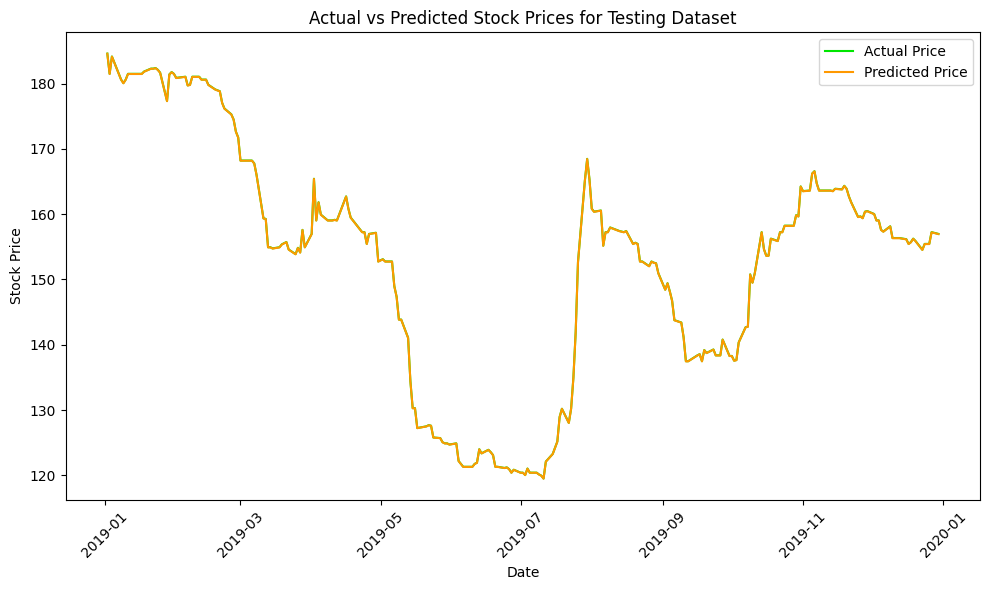

In [ ]:
# plot the actual and predicted values for the testing dataset
plt.figure(figsize=(10, 6))
plt.plot(test_dates, actual_prices, color='#00e600', label='Actual Price')
plt.plot(test_dates, predicted_prices, color='#ff9900', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices for Testing Dataset')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()